In [157]:
from tensorflow import keras
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

In [180]:
img = np.load("celeb_transformed/Angelina Jolie/001_fe3347c0.npy")

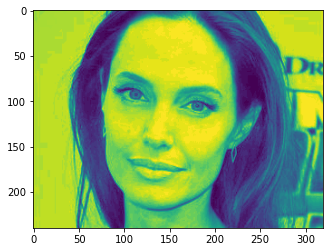

In [184]:
norm_img = img/np.max(img)
plt.imshow(norm_img.T)

In [219]:
celebs_path = Path("celeb_transformed")
labels = [celeb.name for celeb in celebs_path.iterdir()]

In [220]:
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
le.transform(labels)

['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']


array([15, 10,  5,  7, 11,  1,  6,  3, 16,  8, 14,  9,  4, 13,  2, 12,  0])

In [221]:
labels = []
data = []
for celeb in celebs_path.iterdir():
    for file in celeb.iterdir():
        img = np.load(file)
        data.append(img)
        labels.append(le.transform([celeb.name])[0])

labels = np.array(labels)
data = np.array(data)
    

In [222]:
print(labels.shape)
print(data.shape)

(1642,)
(1642, 320, 240)


In [223]:
from collections import Counter
print(Counter(labels))

Counter({13: 184, 7: 97, 3: 96, 4: 96, 11: 95, 9: 95, 2: 94, 10: 92, 8: 92, 6: 91, 15: 90, 14: 89, 12: 89, 0: 89, 5: 86, 1: 84, 16: 83})


In [224]:
train_data, validation_data, train_labels, validation_labels= model_selection.train_test_split(data,labels, random_state=42,test_size=0.2)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))

train data shape: (1313, 320, 240)
validation data shape: (329, 320, 240)
train labels shape: (1313,)
validation labels shape: (329,)


In [225]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

train_data = (train_data-mean) / std
validation_data = (validation_data-mean) / std

In [226]:
train_data.shape

(1313, 320, 240)